Cluster Assignments: [1 1 1 1 0 0 0 0 1 1 0 0]
Final Centroids:
 [[5.2        5.5       ]
 [1.6        1.81666667]]
Within-Cluster Sum of Squares (WCSS): 1.8083333333333338


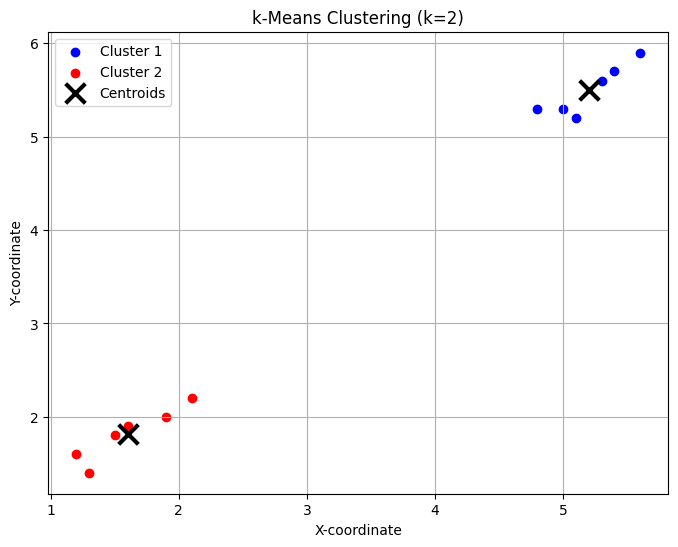

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Provided dataset
data = np.array([
     [1.2, 1.6], [1.6, 1.9], [1.3, 1.4], [1.5, 1.8],
    [4.8, 5.3], [5.6, 5.9], [5.1, 5.2], [5.3, 5.6],
    [2.1, 2.2], [1.9, 2.0], [5.0, 5.3], [5.4, 5.7]
])

class KMeans:
    def __init__(self, k=2, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.clusters = None

    def fit(self, X):
        # Initialize centroids randomly from data points
        indices = np.random.choice(len(X), self.k, replace=False)
        self.centroids = X[indices]

        for _ in range(self.max_iters):
            # Assign points to nearest centroid
            old_centroids = self.centroids.copy()
            self.clusters = self._assign_clusters(X)

            # Update centroids
            for i in range(self.k):
                if np.sum(self.clusters == i) > 0:  # Avoid empty clusters
                    self.centroids[i] = np.mean(X[self.clusters == i], axis=0)

            # Check for convergence
            if np.all(old_centroids == self.centroids):
                break

        # Compute WCSS
        wcss = self._compute_wcss(X)
        return self.clusters, self.centroids, wcss

    def _assign_clusters(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        return np.argmin(distances, axis=0)

    def _compute_wcss(self, X):
        wcss = 0
        for i in range(self.k):
            cluster_points = X[self.clusters == i]
            if len(cluster_points) > 0:
                wcss += np.sum((cluster_points - self.centroids[i]) ** 2)
        return wcss

# Run k-Means
kmeans = KMeans(k=2)
clusters, centroids, wcss = kmeans.fit(data)

# Print results
print("Cluster Assignments:", clusters)
print("Final Centroids:\n", centroids)
print("Within-Cluster Sum of Squares (WCSS):", wcss)

# Visualization
plt.figure(figsize=(8, 6))
# Plot data points, color-coded by cluster
plt.scatter(data[clusters == 0, 0], data[clusters == 0, 1], c='blue', label='Cluster 1')
plt.scatter(data[clusters == 1, 0], data[clusters == 1, 1], c='red', label='Cluster 2')
# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=200, linewidths=3, label='Centroids')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('k-Means Clustering (k=2)')
plt.legend()
plt.grid(True)
plt.show()